<font color='Blue'>First thing we gonna do is we will find the keypoint using the SIFT algorithm libary<br><br>
We will start with imports and read the images and display them.<font>


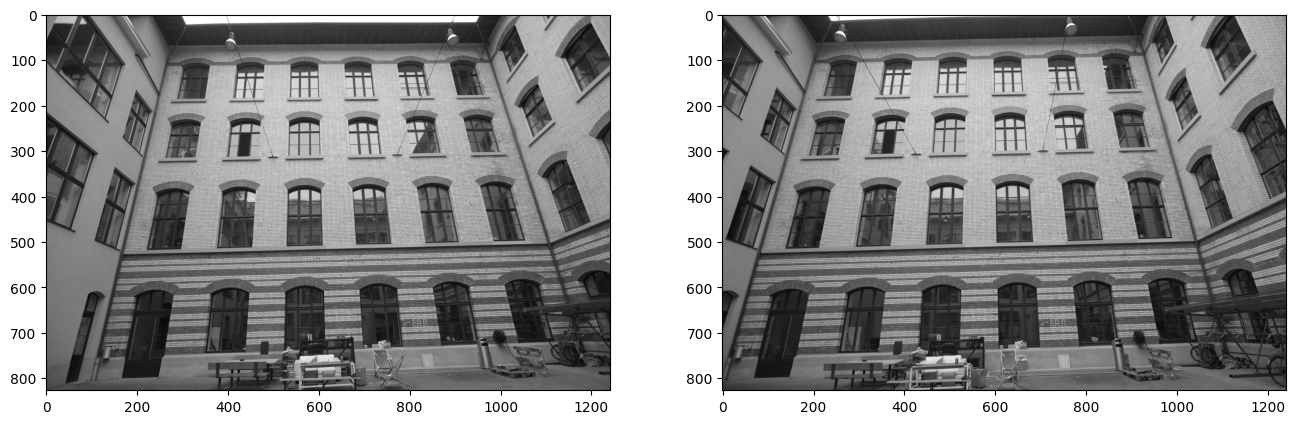

In [24]:
import cv2 
import matplotlib.pyplot as plt

img1_path = 'example_1/I1.png'
img2_path = 'example_1/I2.png'

# read images
img1 = cv2.imread(img1_path)  
img2 = cv2.imread(img2_path) 

#display tehm
figure, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

<font color='Blue'>NOW first Question what we are going to do is to find the Keypoints in both images<Br>
We will Use the SIFT algorithm to detect the keypoint<br><br>
first we create a SIFT object using sift_create and then use the function detectAndCompute to get the keypoints. It will return two values – the keypoints and the sift computer vision descriptors..<font>


In [38]:
# SIFT
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

# Print the number of keypoints detected in each image
print("Length of keypoints_1:", len(keypoints_1))
print("Length of keypoints_2:", len(keypoints_2))

Length of keypoints_1: 5766
Length of keypoints_2: 6427


<font color='Blue'>here is the images drawn on them the keypoints <font>

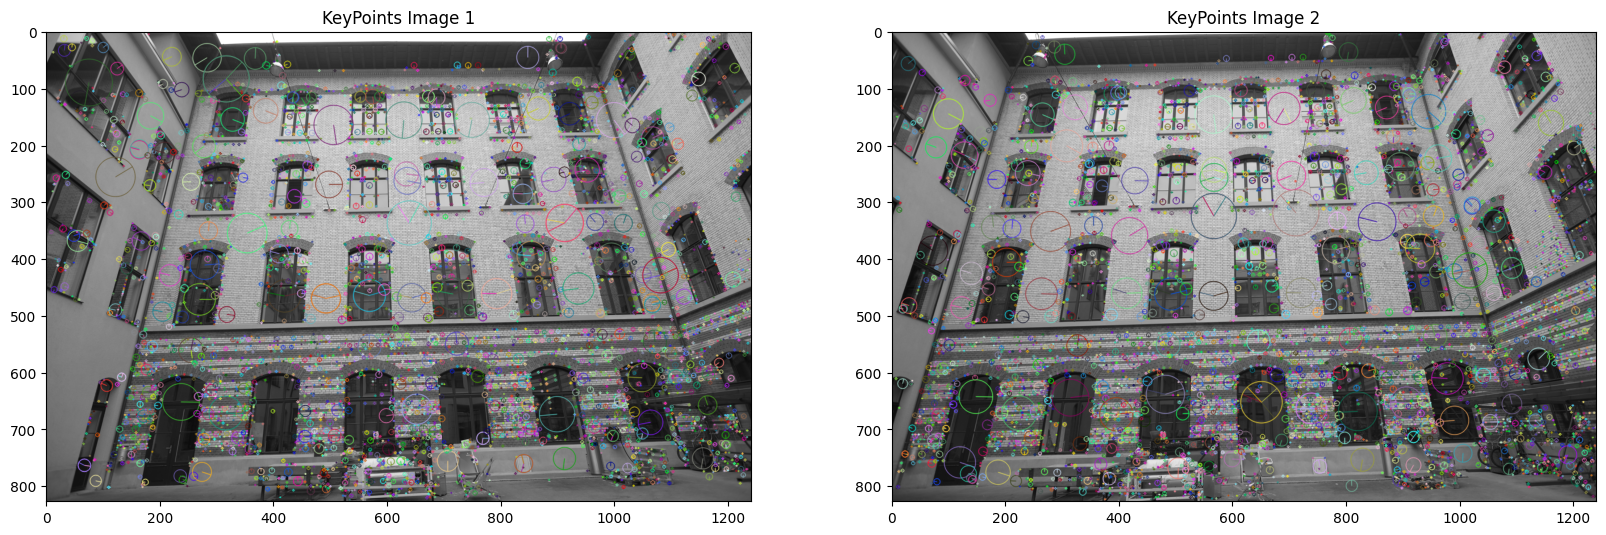

In [40]:
# Mark keypoints on img1
img1_keypoints = cv2.drawKeypoints(img1, keypoints_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Mark keypoints on img2
img2_keypoints = cv2.drawKeypoints(img2, keypoints_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1), plt.imshow(img1_keypoints), plt.title('KeyPoints Image 1')
plt.subplot(1, 2, 2), plt.imshow(img2_keypoints), plt.title('KeyPoints Image 2')
plt.show()

<font color=blue>2.Now we gonna find the Matches bettwen the 2 images using the cv2.BFMatcher

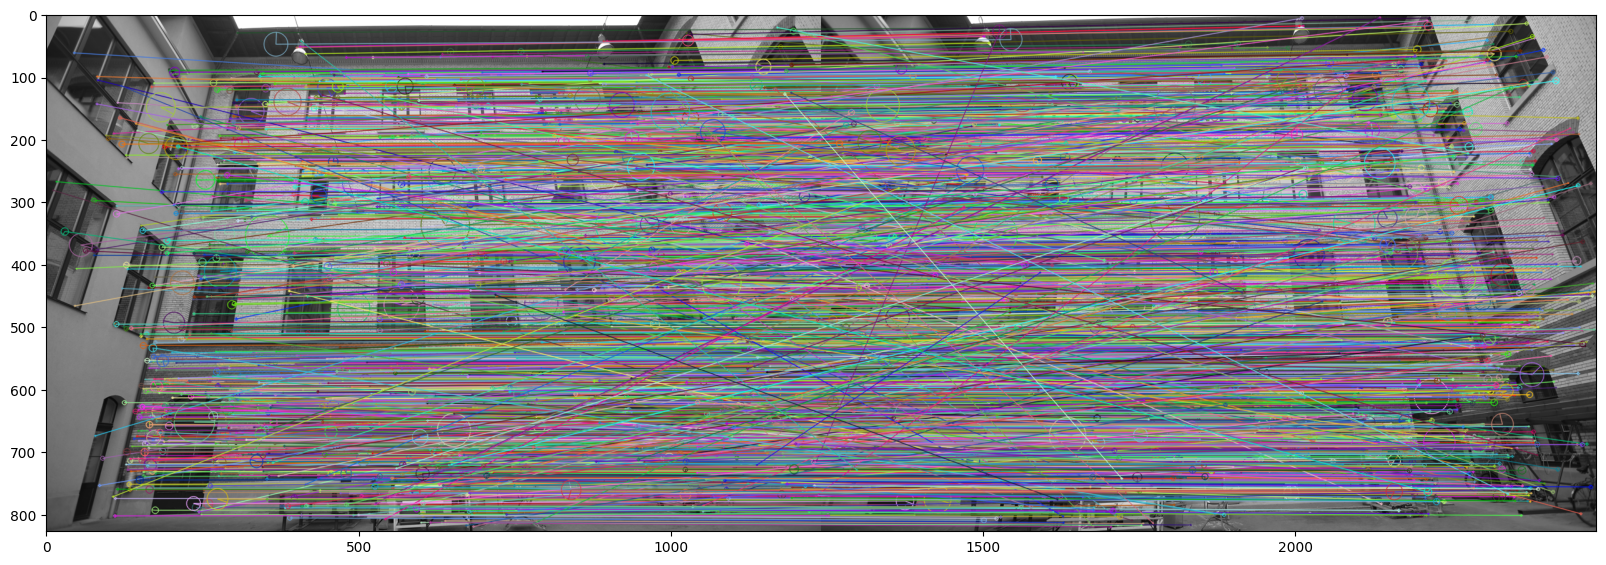

In [47]:

# Step 1: Initialize the BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Step 2: Match descriptors
matches = bf.match(descriptors_1, descriptors_2)

# Step 3: Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Step 4: Draw the first 50 matches with better visibility
img_matches = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches, None, 
                              flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS | cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches with increased figure size for better visibility
plt.figure(figsize=(20,10)) # Increase figure size
plt.imshow(img_matches)
plt.show()

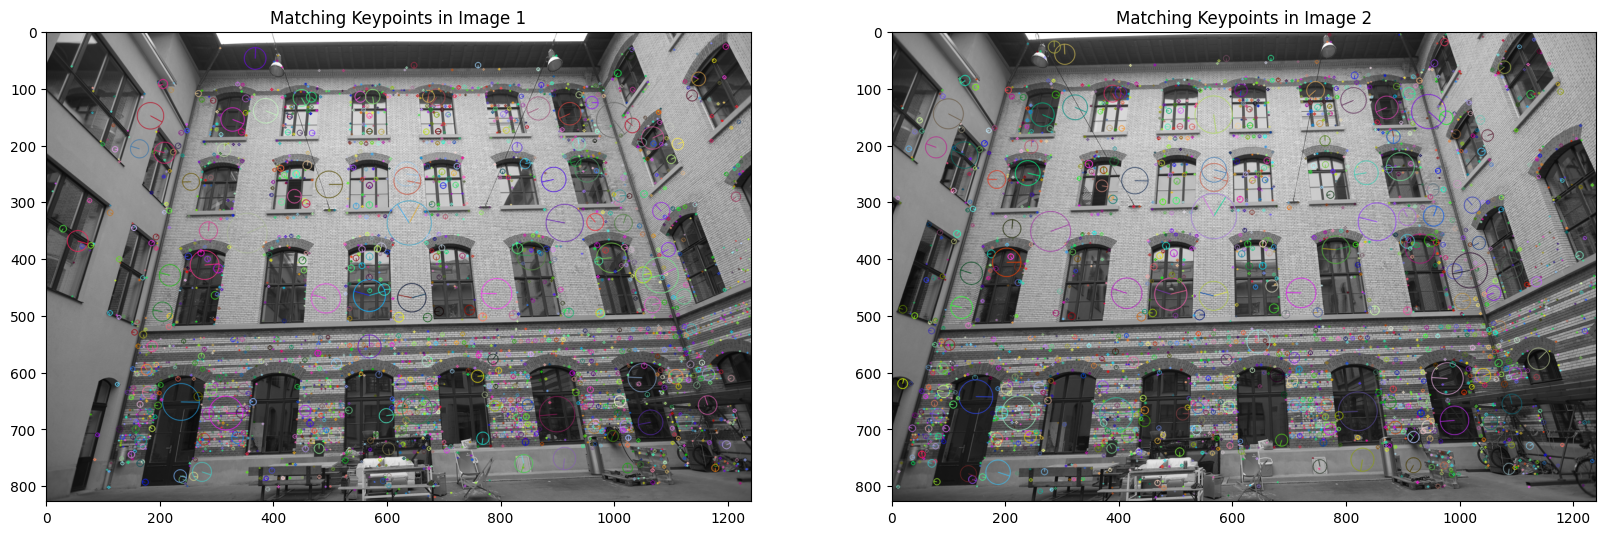

In [48]:
# Extract indices of matching keypoints
keypoints_1_indices = [match.queryIdx for match in matches]
keypoints_2_indices = [match.trainIdx for match in matches]

# Filter the keypoints based on the indices of matches
matching_keypoints_1 = [keypoints_1[i] for i in keypoints_1_indices]
matching_keypoints_2 = [keypoints_2[i] for i in keypoints_2_indices]

# Draw matching keypoints on each image
img1_matches = cv2.drawKeypoints(img1, matching_keypoints_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_matches = cv2.drawKeypoints(img2, matching_keypoints_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with matching keypoints
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1), plt.imshow(img1_matches), plt.title('Matching Keypoints in Image 1')
plt.subplot(1, 2, 2), plt.imshow(img2_matches), plt.title('Matching Keypoints in Image 2')
plt.show()